In [139]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [140]:
data = pd.read_csv("C:/Users/coolc/VSCodeProjects/kmc_crg3ts/data/airbnb_hw.csv")
data["score"] = data["Review Scores Rating"]
data["total_reviews"] = data["Number Of Reviews"]
cols = data.loc[:,['Price','Beds','total_reviews','score']]

cols.describe()

,Beds,total_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [141]:
cols['Price'].value_counts()
cols['Price'] = cols['Price'].str.replace(',','')
cols['Price'] = pd.to_numeric(cols['Price'],errors='coerce')
cols.describe()


,Price,Beds,total_reviews,score
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [142]:
cols["Beds"] = cols["Beds"].fillna(1)
cols.describe()

,Price,Beds,total_reviews,score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [143]:
cols = cols.dropna()
cols.describe()

,Price,Beds,total_reviews,score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


I presume we are only working with data that has ratings

In [144]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

normalized = cols.drop('Price',axis=1)
normalized = normalized.apply(maxmin)


In [145]:
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(normalized)
normalized['cluster'] = model.labels_


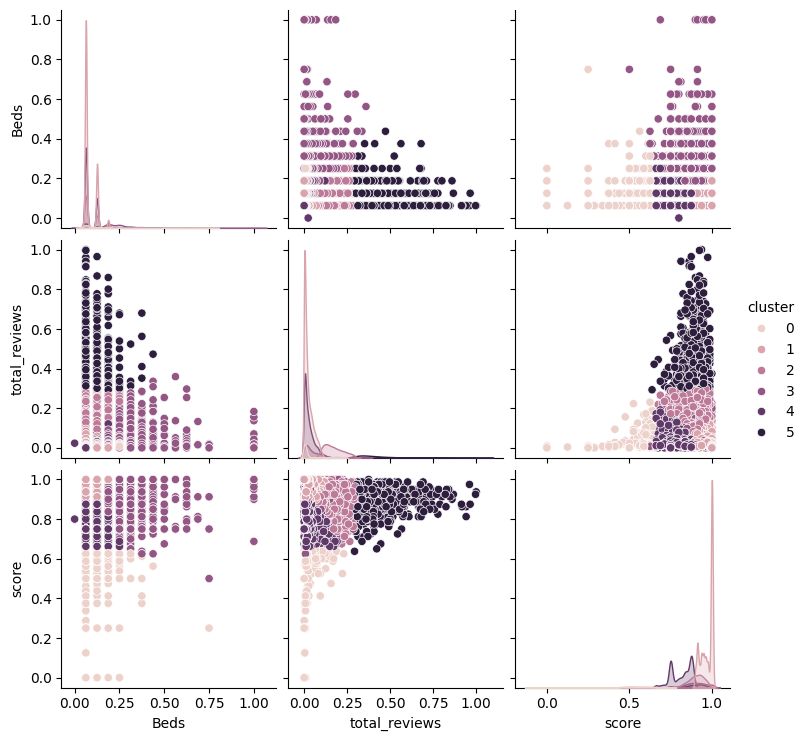

In [146]:
sns.pairplot(data = normalized,hue = 'cluster')

In [147]:
cols['cluster'] = model.labels_
cols.loc[:,['Price', 'cluster']].groupby('cluster').describe()

Price                                                             
           count        mean         std   min    25%    50%     75%      max
cluster                                                                      
0          632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   5000.0
1        10529.0  152.287682  147.227153  10.0   85.0  130.0  190.00  10000.0
2         3022.0  141.489411   83.936285  22.0   87.0  125.0  175.00   1000.0
3         1626.0  293.528905  262.934691  27.0  150.0  229.0  350.00   4500.0
4         5554.0  131.631797  102.758887  20.0   75.0  110.0  169.00   5000.0
5          792.0  133.224747   83.088608  27.0   80.0  110.0  167.50    875.0

Cluster 3 seems to be the most expensive rental as it is $300 per night

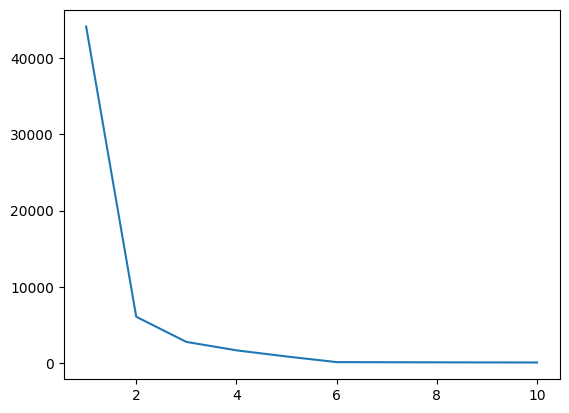

In [149]:
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(normalized) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    
scree_plot = sns.lineplot(x=k_grid, y=SSE)

2 is probably good

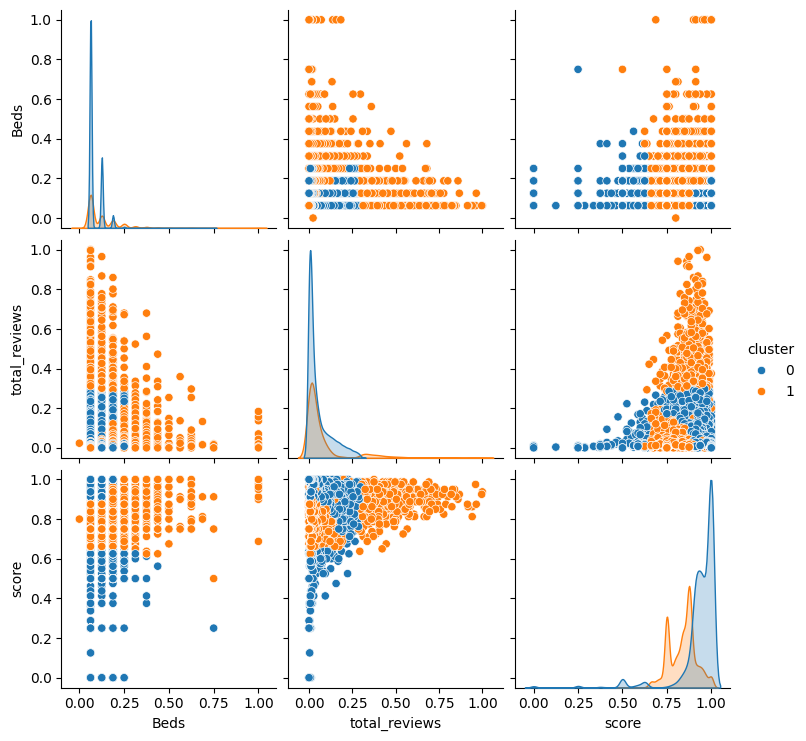

In [151]:
model = KMeans(n_clusters=2, max_iter=300, n_init = 10, random_state=0)
model = model.fit(normalized)
normalized['cluster'] = model.labels_
sns.pairplot(data = normalized,hue = 'cluster')


In [152]:
cols['cluster'] = model.labels_
cols.loc[:,['Price', 'cluster']].groupby('cluster').describe()

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        14183.0  149.153564  140.316751  10.0  85.0  125.0  185.0  10000.0
1         7972.0  164.811214  162.423210  20.0  81.0  129.0  199.0   5000.0

Cluster 1 has a higher average rental price only by a minimal amount. Cluster 1 also has more reviews and higher scores. Cluster 0 has more variability in scores with less reviews, resulting in a large number of listings with low review counts. Cluster 1 having a higher average rental price may reflect the higher scores and larger number of reviews, therefore may be more popular or premium. Cluster 0 might be more budget-friendly since it has a broader range of listings